## PROBLEM STATEMENT
+ In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied.

## STEP 1
+ IMPORT ALL THE LIBRARIES 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 2
+ READ YOUR DATA

In [43]:
data=pd.read_csv("http://bit.ly/w-data")

In [44]:
## for top 5 values
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [45]:
# size of the dataset
data.size

50

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [47]:
## for stats
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [74]:
## for correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [48]:
## Finding the null values 
data.isnull().any()

Hours     False
Scores    False
dtype: bool

## STEP 3
+ VISUALIZATION


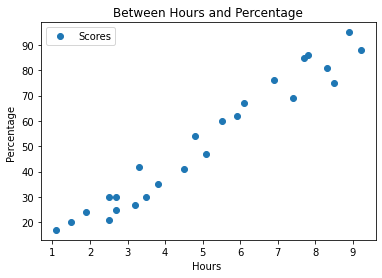

In [49]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Between Hours and Percentage')  
plt.xlabel('Hours ')  
plt.ylabel('Percentage ')  
plt.show()

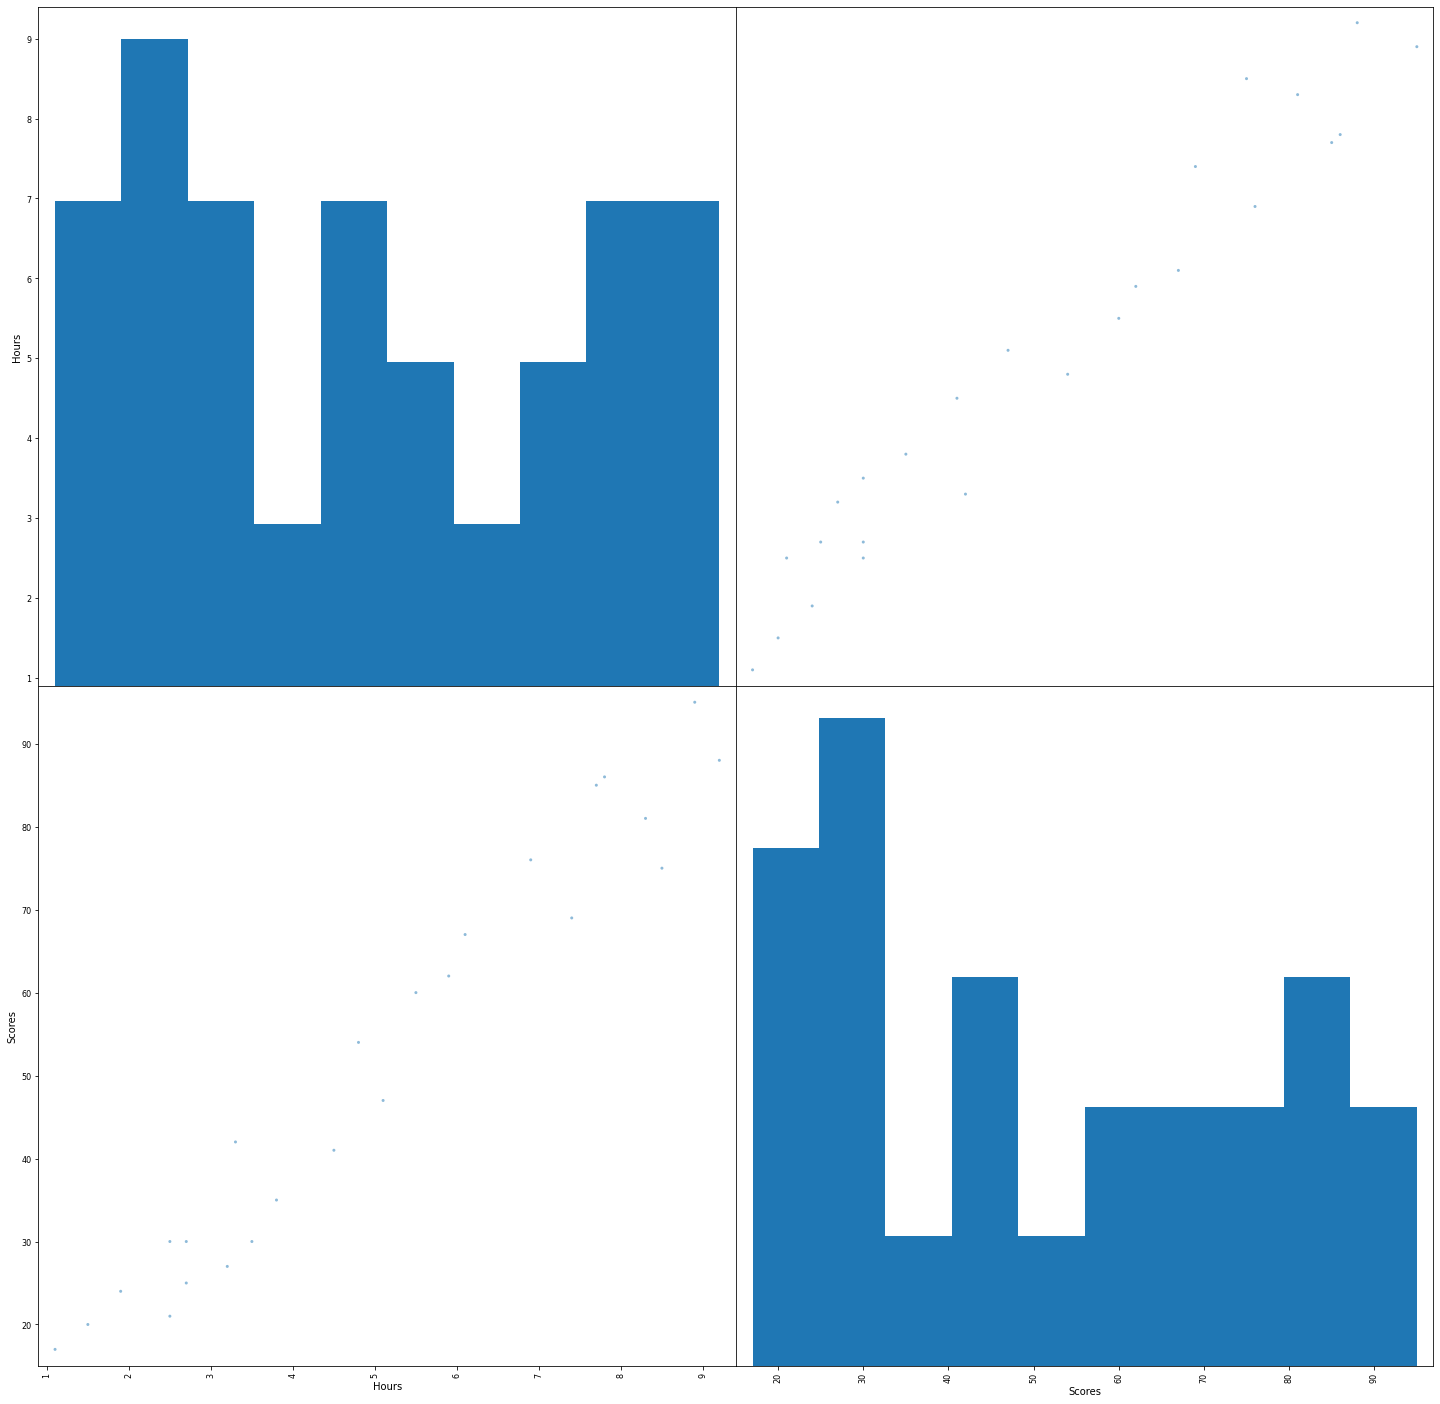

In [50]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(25, 25))

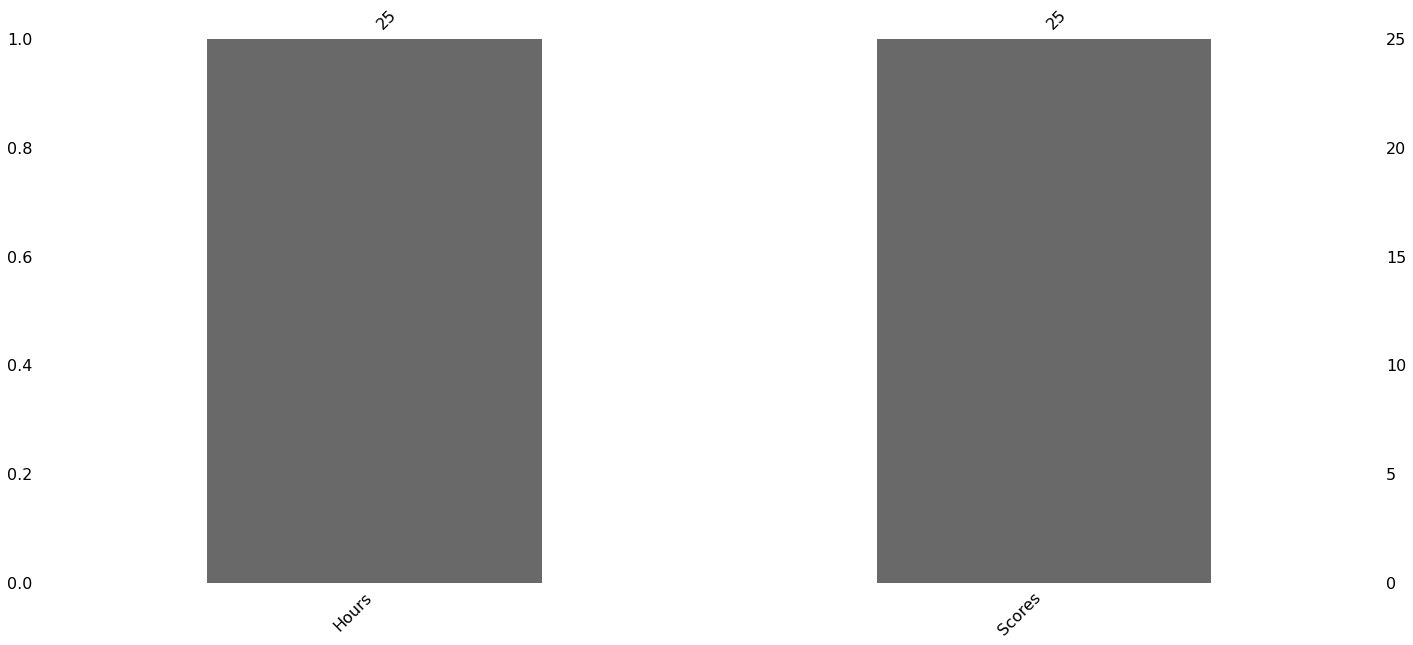

In [51]:
import missingno as msno
p=msno.bar(data)

In [52]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [53]:
## spliting the dataset into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) ## test_size=0.2 means taking the 20% of data for testing 

## STEP 4
+ APPLY MODEL

## LINEAR REGRESSION
+ Linear regression performs the task to predict a dependent variable
value (y) based on a given independent variable (x). So, this regression
technique finds out a linear relationship between x (input) and y(output).
Hence, the name is Linear Regression. If we plot the independent variable (x) 
on the x-axis and dependent variable (y) on the y-axis, linear regression gives
us a straight line that best fits the data points.

In [54]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 



LinearRegression()

In [55]:
# for making the line 
line = reg.coef_*X+reg.intercept_

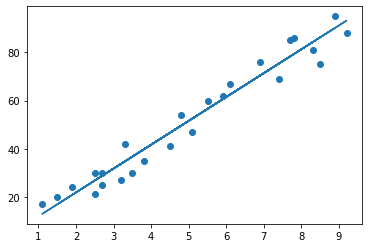

In [56]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [57]:
# predication
print(X_test) 
y_pred = reg.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


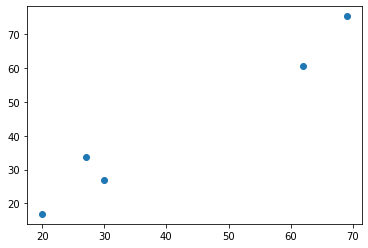

In [68]:
plt.scatter(y_test,y_pred)

<AxesSubplot:>

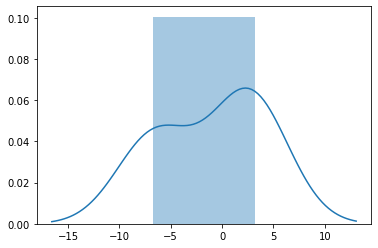

In [69]:
sns.distplot(y_test-y_pred)

In [70]:
# ACTUAL vs PREDICATED
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## STEP 5 
+ EVALUATION

## EVALUATION MODEL
+ Model evaluation is very important in data science.
It helps you to understand the performance of your model
and makes it easy to present your model to other people.
There are many different evaluation metrics out there but 
only some of them are suitable to be used for regression

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i|
 
Mean Squared Error (MSE) is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1n∑i=1n(yi−y^i)2−−−−−−−−−−−−√

In [71]:
from sklearn import metrics

In [72]:

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.183859899002975
MSE: 21.598769307217406
RMSE: 4.647447612100367


In [77]:
## check 
reg.predict(np.array(5.40).reshape(-1,1)).round(2)

array([55.54])